# 01. Neural Network Regression with TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover
Specifically, we're going to go through doing the following with TensorFlow:

* Architecture of a regression model
* Input shapes and output shapes
   * X: features/data (inputs)
   * y: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
       * Defining a loss function
       * Setting up an optimizer
       * Creating evaluation metrics
   * Fitting a model (getting it to find patterns in our data)
* Evaluating a model
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
Loading a model

Don't worry if none of these make sense now, we're going to go through each.

 #### ` 🔑 **Note** : A hyperparameter in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).`

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias tf (short for TensorFlow).








In [ ]:
# import tensorflow
import tensorflow as tf
# see version of tensorflow
print("tensorflow version: " , tf.__version__)

tensorflow version:  2.8.0


# Creating Data to view and fit

Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.



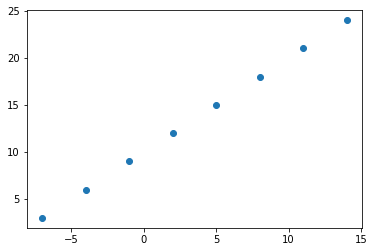

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create a feature 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# create a label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
# viesulaze it 
plt.scatter(X,y)

# Regression input Shape an output shape
One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.



In [ ]:
# example input and output shapes of a regression model
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([933999])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([933999], dtype=int32)>)

In [ ]:
# see shape of two tensor
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

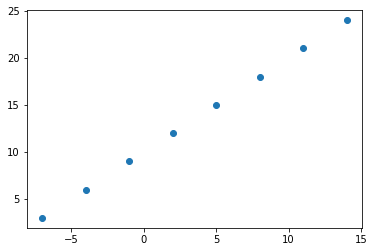

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create a feature 
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# create a label
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
# viesulaze it 
plt.scatter(X,y)

In [ ]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)


(TensorShape([]), TensorShape([]))

Huh?

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specificially a rank 0 tensor or a scalar.

In [ ]:
# now see single example eduviguale
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. ***Compiling a model*** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. ***Fitting a model*** - letting the model try to find patterns in the data (how does X get to y).
Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).



In [ ]:
from tensorflow.python.eager.monitoring import Metric
# set random set seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)                        
])

# complining model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 495ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
tf.expand_dims(X,axis=-1),y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# see X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# let's predict our model
y_preds = model.predict([17.0])
y_preds

array([[12.716021]], dtype=float32)

In [ ]:
y_preds + 11

array([[23.71602]], dtype=float32)

# Improving a model
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).


In [ ]:
# let's recreate same model

# 1. create a model
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)                        
])

# 2. complining a model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")
# 3 fit a model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 260ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [ ]:
# let's see model predict improvement
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# now create one more one hyperparameter again change than see
# create model
model = tf.keras.Sequential([
       tf.keras.layers.Dense(100,activation="relu"),
       tf.keras.layers.Dense(1)                      
])

# compiling model 
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["mae"])
# fit a model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 676ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9962 - mae: 8.9962
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1347 - mae: 8.1347
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4053 - mae: 7.4053
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 5.9141 - mae: 5.9141
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 5.1125 - mae: 5.1125
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 4.2653 - ma

In [ ]:
# let predict a model
model.predict([17.0])

array([[27.159163]], dtype=float32)

# Evaluating a model
A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

> `Visualize, visualize, visualize`

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

* The data - what data are you working with? What does it look like?
* The model itself - what does the architecture look like? What are the different shapes?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?
Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).



In [ ]:
# make bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# label data 
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

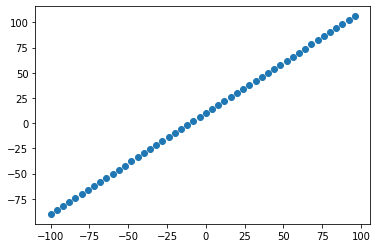

In [ ]:
# visulaze a data 
import matplotlib.pyplot as plt
plt.scatter(X,y)

## Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

1. **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
2. **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
3. **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).
For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

🔑 **Note**: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.



In [ ]:
# train and test split
# set random seed
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X.numpy(),y.numpy(),train_size=0.2)
X_train.size,X_test.size,y_train.size,y_test.size

(10, 40, 10, 40)

In [ ]:
# different way to split a data
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

#len of each of this
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

# Visulazing a data
Now got's training and test data visulazing plot.

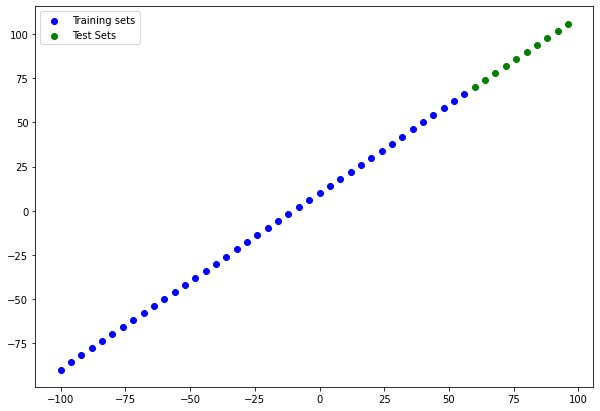

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, c="b",label="Training sets")
plt.scatter(X_test,y_test,c="g",label="Test Sets")
plt.legend()

In [ ]:
# now create one neural network model
model = tf.keras.Sequential([
       tf.keras.layers.Dense(1)                      
])

model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["mae"])
# model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# doesn't work model (build/fit).
# model.summary() ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

We can let our model know the input shape of our data using the input_shape parameter to the first layer (usually if input_shape isn't defined, Keras tries to figure it out automatically).



In [ ]:
# set to random seed
tf.random.set_seed(42)
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],name="input_layer2"),
    tf.keras.layers.Dense(1,name="output_layer"),

],name="model_1")

# model compile
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["mae"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer2 (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

**📖 Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

**🛠 Exercise**: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.



In [ ]:

# fit model to training data
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer2 (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Alongside summary, you can also view 2D View.

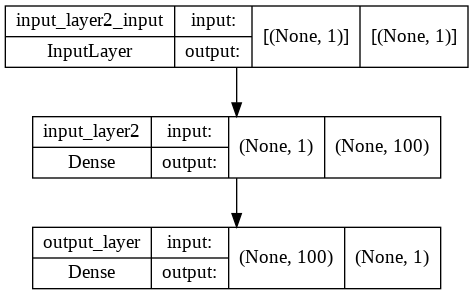

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

# Visulizing our model prediction


In [ ]:
# let's make model prediction
y_pred = model.predict(X_test)
y_pred

array([[ 70.970924],
       [ 75.02875 ],
       [ 79.08656 ],
       [ 83.144394],
       [ 87.20222 ],
       [ 91.26004 ],
       [ 95.317856],
       [ 99.37568 ],
       [103.4335  ],
       [107.49133 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note** : if you think you're going to be visulize something a lot. a good idea to funcionarize use latter

In [ ]:
# create plot function
def plot_predict(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label = y_test,
                 predict_data = y_pred):
    
    """
    ploting training data,testing data and compare prediction data
    """
    # set fig size
    plt.figure(figsize=[10,7])

    # create training data in blue
    plt.scatter(train_data,train_label,c="b",label="Training data")
    
    # create testing data in green
    plt.scatter(test_data,test_label,c="g",label="Test Data")
    
    # create model's prediction data in red.
    plt.scatter(test_data,predict_data,c="r",label="Model prediction data")
    plt.legend()

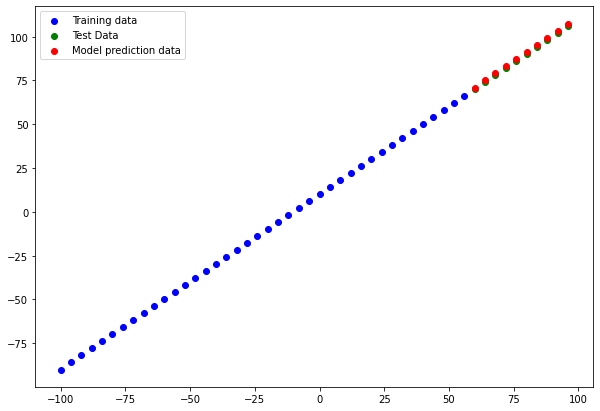

In [ ]:
plot_predict()

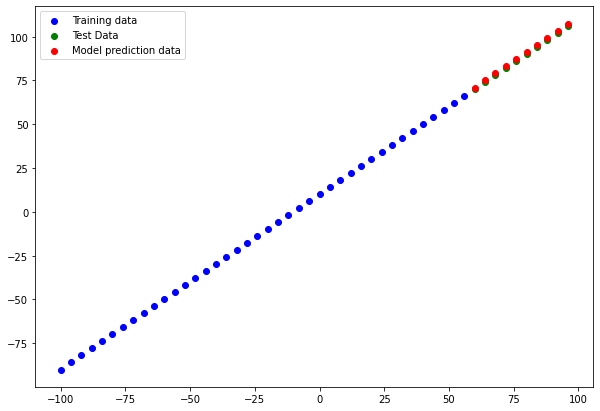

In [ ]:
# now fill function all parameters manually
plot_predict(train_data=X_train,train_label=y_train,test_data=X_test,test_label=y_test,predict_data=y_pred)

# Evaluating prediction
Alongside visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on , different models have different evalutation metrics.
Two of the main metrics used for regression problems are:

* Mean absolute error (MAE) - the mean difference between each of the predictions.
* Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimetal than smaller errors).
The lower each of these values, the better.

You can also use model.evalueate() which will return the loss of the model as well as any metrics setup during the compile step. 

In [ ]:
# evualting model on the test set
model.evaluate(y)

2/2 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0]

In [ ]:
# calculate mean absolute error two code is same meaning but i'm write becuse prectice my self.
tf.metrics.mean_absolute_error(y_test,y_pred) ,tf.keras.losses.MAE(y_test,y_pred)

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([17.22326 , 14.182752, 11.965375, 10.571121, 10.      , 10.252008,
        11.327143, 13.225408, 15.946802, 19.491333], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([17.22326 , 14.182752, 11.965375, 10.571121, 10.      , 10.252008,
        11.327143, 13.225408, 15.946802, 19.491333], dtype=float32)>)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# calculate mean squared error two code is same meaning but i'm write becuse prectice my self.
tf.metrics.mean_squared_error(y_test,y_pred) , tf.keras.losses.MSE(y_test,y_pred)

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([421.9894 , 300.2534 , 211.44937, 155.5769 , 132.63644, 142.62787,
        185.55103, 261.4061 , 370.193  , 511.9121 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([421.9894 , 300.2534 , 211.44937, 155.5769 , 132.63644, 142.62787,
        185.55103, 261.4061 , 370.193  , 511.9121 ], dtype=float32)>)

In [ ]:
y_pred # see extra dimansional add this and not a tensor

array([[ 70.970924],
       [ 75.02875 ],
       [ 79.08656 ],
       [ 83.144394],
       [ 87.20222 ],
       [ 91.26004 ],
       [ 95.317856],
       [ 99.37568 ],
       [103.4335  ],
       [107.49133 ]], dtype=float32)

In [ ]:
y_pred = tf.constant(tf.squeeze(y_pred)) # convert to tensorflow tensor and remove extra dimansional
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.970924,  75.02875 ,  79.08656 ,  83.144394,  87.20222 ,
        91.26004 ,  95.317856,  99.37568 , 103.4335  , 107.49133 ],
      dtype=float32)>

In [ ]:
# now see same code write and mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.2311256>

In [ ]:
# same as mean square error
mse = tf.metrics.mean_squared_error(y_test,y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.5432541>

In [ ]:
# make a function reuse mae and mse 
def mae(y_test, y_pred): 
    return tf.metrics.mean_absolute_error(y_test,y_pred)
def mse(y_test,y_pred): 
    return tf.metrics.mean_squared_error(y_test,y_pred)


In [ ]:
mae(y_test,y_pred),mse(y_test,y_pred)


(<tf.Tensor: shape=(), dtype=float32, numpy=1.2311256>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5432541>)

# Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. **```model_1```** - same as original model, 1 layer, trained for 100 epochs.
2. **```model_2```** - 2 layers, trained for 100 epochs.
3. **```model_3```** - 2 layers, trained for 500 epochs.


In [ ]:
# let's create model 1 
# frist set to rendom seed
tf.random.set_seed(42)

# crate a model_1 = 1 layer ,trained for 100 epochs
model_1 = tf.keras.Sequential([
       tf.keras.layers.Dense(1)                        
])

# compile model
model_1.compile(loss=tf.keras.losses.mae,optimizer= tf.keras.optimizers.SGD(),metrics=["mae"])

# fit a model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=False)


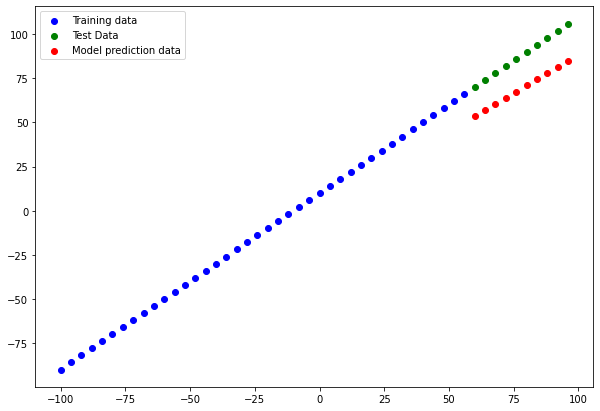

In [ ]:
y_pred_1 =  model_1.predict(X_test)
plot_predict(predict_data=y_pred_1)

In [ ]:
# calculate model 1 mean absolute error and mean squared error
# mea and mse
mae1 = mae(y_test,y_pred_1.squeeze()).numpy()
mse1 = mse(y_test,y_pred_1.squeeze()).numpy()
mae1,mse1


(18.745327, 353.57336)

In [ ]:
# let's create model 2
# first set to random seed
tf.random.set_seed(42)

# create model_2 = 2 layer ,trained for 100 epochs
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile model
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

# fit a model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=False)

(None, array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32))

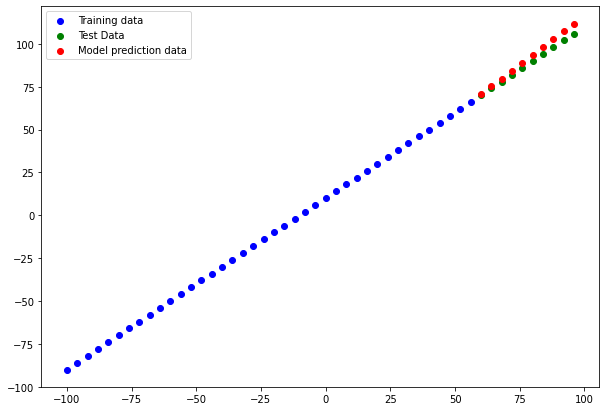

In [ ]:
y_pred2 = model_2.predict(X_test)
plot_predict(predict_data=y_pred2),y_pred2

In [ ]:
# mea and mse
mae2 = mae(y_test,y_pred2.squeeze()).numpy()
mse2 = mse(y_test,y_pred2.squeeze()).numpy()
mae2,mse2


(3.1969407, 13.070143)

In [ ]:
# create a model 3  layer 500 layers
# frist set random seed
tf.random.set_seed(42)

# create a third model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# model compile 
model_3.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
# model fit
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=False)

(None, array([[15.854742],
        [16.617329],
        [17.379915],
        [18.142504],
        [18.905092],
        [19.667677],
        [20.430264],
        [21.192854],
        [21.95544 ],
        [22.718027]], dtype=float32))

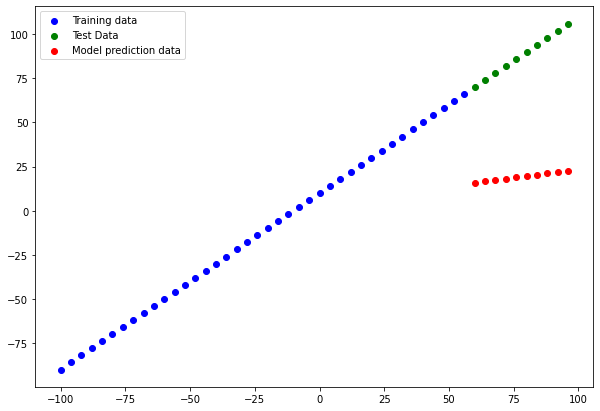

In [ ]:
y_pred_3 = model_3.predict(X_test)
plot_predict(predict_data=y_pred_3),y_pred_3

In [ ]:
# mae and mse in model_3 see
mae3 = mae(y_test,y_pred_3.squeeze())
mse3 = mse(y_test,y_pred_3.squeeze())
mae3,mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

# Comparing result

Now we've got result for 3 similer but slightly different result.let's compare them.

In [ ]:
# let's compare model but use pandas data frame
import pandas as pd
model_result = [["model 1",mae1,mse1],
                ["model 2",mae2, mse2],
                ["model 3",mae3.numpy(),mse3.numpy()]]
all_result = pd.DataFrame(model_result,columns=["model","mae","mse"])
all_result

,model,mae,mse
0,model 1,18.745327,353.573364
1,model 2,3.196941,13.070143
2,model 3,68.713615,4808.027344


From our model experiment ,it look like model_2 is performans best.

> **🔑 Note**: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

# Tracking your experiments
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables)

> **📖 Resource**: But as you build more models, you'll want to look into using tools such as:

* **TensorBoard** - a component of the TensorFlow library to   help track modelling experiments (we'll see this later).
* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).


# Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

* The [SavedModel](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) format (default).
* The [HDF5](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format) format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.



In [ ]:
# save a model using SaveModel format.
model_2.save("best_model_SaveModel_format")

INFO:tensorflow:Assets written to: best_model_SaveModel_format/assets


In [ ]:
# save a model use HDF5
model_2.save("best_model_HDF5_format.h5")

# Now this time load our model



In [ ]:
saved_model_format = tf.keras.models.load_model("/content/best_model_SaveModel_format")
saved_model_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check summary match our model_2
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# now check model_2 prediction compare with saved_model_format.
model_2_preds = model_2.predict(X_test)
saved_model_format_preds = saved_model_format.predict(X_test)

# compare tham
model_2_preds == saved_model_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# load our model .h5 format.
model_h5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")
model_h5_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# match our model_2  summary
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compare between model_h5_format prediction same as model_2 prediction
model_h5_format_preds = model_h5_format.predict(X_test)
model_2_preds = model_2.predict(X_test)
# compare tham
model_2_preds == model_h5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Downloading a model (from Google Colab)
Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

* Right click on the file in the files pane and click 'download'.
* Use the code below.


In [ ]:
# # Download the model (or any file ) from google colab
# from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

In [ ]:
# save file google colab to google drive (requires mountint drive)
# !cp "/content/best_model_HDF5_format.h5" /content/drive/MyDrive/TensorFlow

# A larger example
Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich datase.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

> **🔑 Note**: When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.



In [ ]:
# import necesarry libary
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# some insurance column under data is object but machine understand only numerical frist convert to numerical.
# now create one-hot_encoder in pandas get_dummies() use.
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# create X & y 
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# now split our data into training set and test set
# frist set random seed
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) # same this above and random_state
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [ ]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [ ]:
# length of all
len(X_train),len(y_train),len(X_test),len(y_test),len(X_train.columns)

(1070, 1070, 268, 268, 11)

In [ ]:
# create a model
# frist set random seed
tf.random.set_seed(42)
# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile a model
insurance_model.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
# fit a model
history_1 = insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7578.0859 - mae: 7578.0859
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7514.6172 - mae: 7514.6172
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.9136 - mae: 7595.9136
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7735.9116 - mae: 7735.9116

In [ ]:
# evulate a model
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

Text(0, 0.5, 'loss')

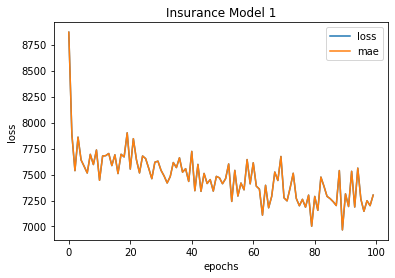

In [ ]:
# see insurance_model history
pd.DataFrame(history_1.history).plot()
plt.title("Insurance Model 1")
plt.xlabel("epochs")
plt.ylabel("loss")

# Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

* Increasing the number of layers (2 -> 3).
* Increasing the number of units in each layer (except for the output layer).
* Changing the optimizer (from SGD to Adam).


In [ ]:
tf.random.set_seed(42)
# create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile a model
insurance_model_2.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

# fit a model
history_2 = insurance_model_2.fit(X_train,y_train,epochs=100,verbose=False)

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

🔑 Note: For many problems, the Adam optimizer is a great starting choice. See Andrei Karpathy's "Adam is safe" point from A Recipe for Training Neural Networks for more.

Let's check out the loss curves of our model, we should see a downward trend.



Text(0.5, 0, 'epochs')

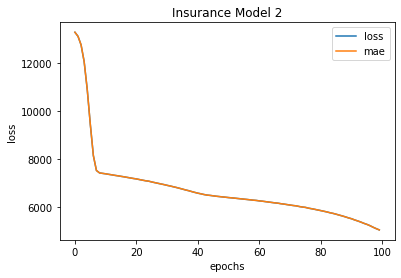

In [ ]:
# plot history (also known as a loss curve)
pd.DataFrame(history_2.history).plot()
plt.title("Insurance Model 2")
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# now one more create a model but this time epochs increase
# set random sedd
tf.random.set_seed(42)
# 1. create a model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. compile a model
insurance_model_3.compile(loss=tf.keras.losses.MAE,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])
# 3. fit a model
history_3 = insurance_model_3.fit(X_train,y_train,epochs=200,verbose=0)


In [ ]:
# evaluate a model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0, 0.5, 'loss')

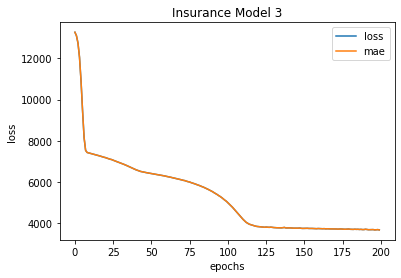

In [ ]:
# see insurance model 3 plot
pd.DataFrame(history_3.history).plot()
plt.title("Insurance Model 3")
plt.xlabel("epochs")
plt.ylabel("loss")

.

> 🤔 Question: How long should you train for?
It depends on what problem you're working on. Sometimes
training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.



In [ ]:
# now create model but this time earlyStopping callback
# set random seed
tf.random.set_seed(42)
# callback create
callback = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=100)

# create model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# compile a model
insurance_model_4.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])
# fit the model
history_4 = insurance_model_4.fit(X_train,y_train,callbacks=[callback])

34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602


In [ ]:
len(history_4.history["loss"])

1

# Preprocessing data (normalization and standardization)
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* Feature scaling:
  * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
  * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.

  * **Which one should you use**?
    * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> **📖 Resource:** For more on preprocessing data, I'd recommend reading the following resources:
* [Scikit-Learn's documentation on preprocessing data.](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data)
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

We've already turned our data into numbers using get_dummies(), let's see how we'd normalize it as well.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read insurance data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* make_column_transformer - build a multi-step data preprocessing function for the folllowing trnasformations:
 * MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
 * OneHotEncoder - one hot encode the non-numerical columns.
Let's see them in action.



In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer (this will help us normlize/preprossing data)
ct = make_column_transformer((MinMaxScaler(),["age","bmi","children"]),
                             (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
                             )
# Create X & y 
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure some split as before)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# fit column tensorformer on the training data only (doling so on test data would result in data leaked)
ct.fit(X_train)
# Transfrom training and testing data normailize use(MinMaxScaler) and (OneHotEncoder) 
X_train_normalize = ct.transform(X_train)
X_test_normalize = ct.transform(X_test)


In [ ]:
# see first item in normalize 
X_train_normalize[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# see orginal item 
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# shape of two X train variable
X_train_normalize.shape,X_train.shape

((1070, 11), (1070, 6))

In [ ]:
# now build our model
# set random seed
tf.random.set_seed(42)
# create a model model 5
insurance_model_5  = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# compile a model 
insurance_model_5.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

# fit a model
insurance_model_5.fit(X_train_normalize,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [ ]:
insurance_model_5.evaluate(X_test_normalize,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

# prectice model create learge data set

In [ ]:
# now one more prectice own
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance_2 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split 

# create X & y 
X = insurance_2.drop("charges",axis=1)
y = insurance_2["charges"]

# splits a data into train and test sets (use train_test_split and mensure set random set)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

# make column transforme create
ct = make_column_transformer((MinMaxScaler(),["age","bmi","children"]),
                             (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))
# only training data fit our column transformer
ct.fit(X_train)
# preprossing our training data and testing data into normalize and OneHotEncoder
X_train_normalize = ct.transform(X_train)
X_test_normalize = ct.transform(X_test)

# see normalize data
X_train_normalize[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# see orginal X_train data
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# see shape of normalize data and unnormalize data
X_train.shape,X_train_normalize.shape

((1070, 6), (1070, 11))

In [ ]:
# now create a model
# frist set random seed
tf.random.set_seed(42)
# second create a model
insurance_model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# third compile a model
insurance_model_6.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])
# fourth fit a model
history_6 = insurance_model_6.fit(X_train_normalize,y_train,epochs=100,verbose=False)


Text(0, 0.5, 'loss')

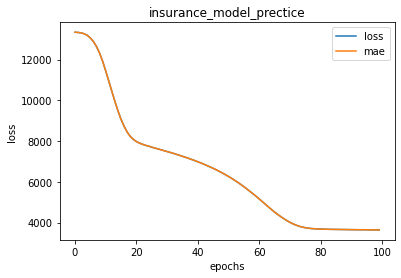

In [ ]:
pd.DataFrame(history_6.history).plot()
plt.title("insurance_model_prectice")
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
# X_test normalize data convert than predict
X_test_normalize = ct.transform(X_test)
# predict our model
y_preds_6 = insurance_model_6.predict(X_test_normalize)
y_preds_6.shape , y_test.shape

((268, 1), (268,))

In [ ]:
mae(y_test=y_test,y_pred=y_preds_6.squeeze())


<tf.Tensor: shape=(), dtype=float32, numpy=3438.7844>